In [12]:
import process_helper as proc
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

EXP_TYPE = 'contrast'
EXP_NAME = 'contrast'
LIST_VALS = [0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.6, 1.7, 1.8, 1.9, 2.0,
             2.5, 3.0, 3.5, 8.5, 9.0, 9.5, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0]

subdir_pattern = '*/*/eval.csv'  # This example finds all .txt files in all subdirectories

list_of_root_dirs_by_augment_degree = proc.generate_root_dirs_by_experiment_and_augment_degree_new(
    exp_main_folder='exp-' + EXP_TYPE, 
    exp_name='pendulum_swingup',  
    agent_name='drqv2_aug_pixels-True-' + EXP_NAME + '-', 
    list_vals=LIST_VALS)

datasets_dict = proc.load_datasets_by_directory(list_of_root_dirs_by_augment_degree, subdir_pattern, show=False)

In [13]:
for root_directory in list_of_root_dirs_by_augment_degree:
    print(root_directory, ' : ' ,len(datasets_dict[root_directory]))

/Users/victor/Documents/python-projects/smart-rl/exp-contrast/exp/pendulum_swingup/drqv2_aug_pixels-True-contrast-0.1  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-contrast/exp/pendulum_swingup/drqv2_aug_pixels-True-contrast-0.2  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-contrast/exp/pendulum_swingup/drqv2_aug_pixels-True-contrast-0.3  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-contrast/exp/pendulum_swingup/drqv2_aug_pixels-True-contrast-0.5  :  2
/Users/victor/Documents/python-projects/smart-rl/exp-contrast/exp/pendulum_swingup/drqv2_aug_pixels-True-contrast-0.6  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-contrast/exp/pendulum_swingup/drqv2_aug_pixels-True-contrast-0.7  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-contrast/exp/pendulum_swingup/drqv2_aug_pixels-True-contrast-0.8  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-contrast/exp/pendulum_swingup/drqv2_aug_pixels-True-contrast-0.9  :  1
/Users/v

In [16]:
column_name = 'episode_reward'
result_stats = proc.generate_stats_for_directories(list_of_root_dirs_by_augment_degree, datasets_dict, column_name)
summary_statistics = proc.compute_summary_stats(result_stats)

# for key, stats in summary_statistics.items():
#     print(f"Directory: {key}")
#     print("Sum Statistics:", stats['Sum Statistics'])
#     print("Max Statistics:", stats['Max Statistics'])


print("\n...printing Mean over Sums")
mean_vals_over_sums_performance = proc.extract_stat(summary_statistics, stat_name='Sum Mean', stat_type='Sum Statistics')
sorted_items = proc.print_sorted(mean_vals_over_sums_performance, sort_by='value', desc=True)

print("\n...printing Max over Sums")
max_vals_over_sums_performance = proc.extract_stat(summary_statistics, stat_name='Sum Max', stat_type='Sum Statistics')
sorted_items = proc.print_sorted(max_vals_over_sums_performance, sort_by='value', desc=True)



print("\n...printing Max over Maxes")
max_vals_over_max_performance = proc.extract_stat(summary_statistics, stat_name='Max Max', stat_type='Max Statistics')
sorted_items = proc.print_sorted(max_vals_over_max_performance, sort_by='value', desc=True)

print("\n...printing Mean over Maxes")
mean_vals_over_max_performance = proc.extract_stat(summary_statistics, stat_name='Max Mean', stat_type='Max Statistics')
sorted_items = proc.print_sorted(mean_vals_over_max_performance, sort_by='value', desc=True)



...printing Mean over Sums
0.8: 76014.9
0.7: 70814.3
1.0: 63753.4
0.5: 60313.84999999999
0.9: 58893.10000000001
0.6: 53485.899999999994
1.1: 48104.4
1.4: 26420.700000000004
1.2: 15578.300000000001
1.3: 14749.600000000002
0.2: 12496.400000000001
1.6: 8984.199999999999
0.3: 7463.0
1.8: 5305.2
1.7: 3648.7999999999997
1.9: 1515.7
9.0: 1513.0
2.5: 1431.6
3.0: 1411.4
15.0: 1380.0
12.0: 1364.8999999999999
13.0: 1360.2
10.5: 1356.6000000000001
11.0: 1348.4999999999998
14.5: 1347.9999999999998
9.5: 1346.7
3.5: 1341.1000000000001
13.5: 1332.3999999999999
8.5: 1331.7
14.0: 1324.6999999999998
2.0: 1316.9
12.5: 1312.3
11.5: 1291.6
0.1: 383.5

...printing Max over Sums
0.8: 76014.9
0.5: 71235.3
0.7: 70814.3
1.0: 63753.4
0.9: 58893.10000000001
0.6: 53485.899999999994
1.1: 48104.4
1.4: 26420.700000000004
1.2: 15578.300000000001
1.3: 14749.600000000002
0.2: 12496.400000000001
1.6: 8984.199999999999
0.3: 7463.0
1.8: 5305.2
1.7: 3648.7999999999997
1.9: 1515.7
9.0: 1513.0
2.5: 1431.6
3.0: 1411.4
15.0: 13

In [17]:
subdir_pattern = '*/*/augment.csv'
EXP_NAME = 'contrast'

list_of_root_dirs_by_augment_stats = proc.generate_root_dirs_by_experiment_and_augment_degree_new_augment_stats(
    exp_main_folder='exp-' + EXP_TYPE, 
    exp_name='pendulum_swingup_augment_stats',  
    agent_name='drqv2_aug_pixels-True-' + EXP_NAME + '-', 
    list_vals=LIST_VALS)

datasets_augstats_dict = proc.load_datasets_by_directory(
    list_of_root_dirs_by_augment_stats, subdir_pattern, show=False)


for root_directory in list_of_root_dirs_by_augment_stats:
    print(root_directory, ' : ' ,len(datasets_augstats_dict[root_directory]))

/Users/victor/Documents/python-projects/smart-rl/exp-contrast/exp/pendulum_swingup_augment_stats/drqv2_aug_pixels-True-contrast-0.1  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-contrast/exp/pendulum_swingup_augment_stats/drqv2_aug_pixels-True-contrast-0.2  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-contrast/exp/pendulum_swingup_augment_stats/drqv2_aug_pixels-True-contrast-0.3  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-contrast/exp/pendulum_swingup_augment_stats/drqv2_aug_pixels-True-contrast-0.5  :  2
/Users/victor/Documents/python-projects/smart-rl/exp-contrast/exp/pendulum_swingup_augment_stats/drqv2_aug_pixels-True-contrast-0.6  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-contrast/exp/pendulum_swingup_augment_stats/drqv2_aug_pixels-True-contrast-0.7  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-contrast/exp/pendulum_swingup_augment_stats/drqv2_aug_pixels-True-contrast-0.8  :  1
/Users/victor/Documents/python-pro

In [20]:
stats_column_names = [
        "manhattan",
#         "kl_div",
        "hamming",
        "euclidian",
        "chebyshev",
        "cosine_dist",
#         "bhattacharyya"
]

sorted_mean_vals_over_sums_performance = proc.print_sorted(mean_vals_over_sums_performance, sort_by='value', desc=False, print_it=False)
sorted_max_vals_over_sums_performance = proc.print_sorted(max_vals_over_sums_performance, sort_by='value', desc=False, print_it=False)
sorted_mean_vals_over_max_performance = proc.print_sorted(mean_vals_over_max_performance, sort_by='value', desc=False, print_it=False)
sorted_max_vals_over_max_performance = proc.print_sorted(max_vals_over_max_performance, sort_by='value', desc=False, print_it=False)


for distance in stats_column_names:
    result_stats = proc.generate_stats_for_augment_stats_directories(list_of_root_dirs_by_augment_stats, datasets_augstats_dict, distance)
    mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
    sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

    print("\n", distance)
    correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
    print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

    correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
    print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

    correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
    print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

    correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
    print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)
    print()



 manhattan
Pearson correlation coefficient (means over sums): 0.904566220586692
Pearson correlation coefficient (maxes over sums): 0.9020572199907859
Pearson correlation coefficient (means over maxes): 0.9834231755697125
Pearson correlation coefficient (maxes over maxes): 0.9825532607739909


 hamming
Pearson correlation coefficient (means over sums): 0.1143351637012428
Pearson correlation coefficient (maxes over sums): 0.1135915351126276
Pearson correlation coefficient (means over maxes): 0.14154531936313597
Pearson correlation coefficient (maxes over maxes): 0.14135150089896392


 euclidian
Pearson correlation coefficient (means over sums): 0.9047791311928816
Pearson correlation coefficient (maxes over sums): 0.9022735549317648
Pearson correlation coefficient (means over maxes): 0.9834713920465535
Pearson correlation coefficient (maxes over maxes): 0.9826015423437691


 chebyshev
Pearson correlation coefficient (means over sums): 0.8935816804275509
Pearson correlation coefficient (m

Pearson correlation coefficient (means over sums): 0.9047791311928816
Pearson correlation coefficient (maxes over sums): 0.9022735549317648
Pearson correlation coefficient (means over maxes): 0.9834713920465535
Pearson correlation coefficient (maxes over maxes): 0.9826015423437691


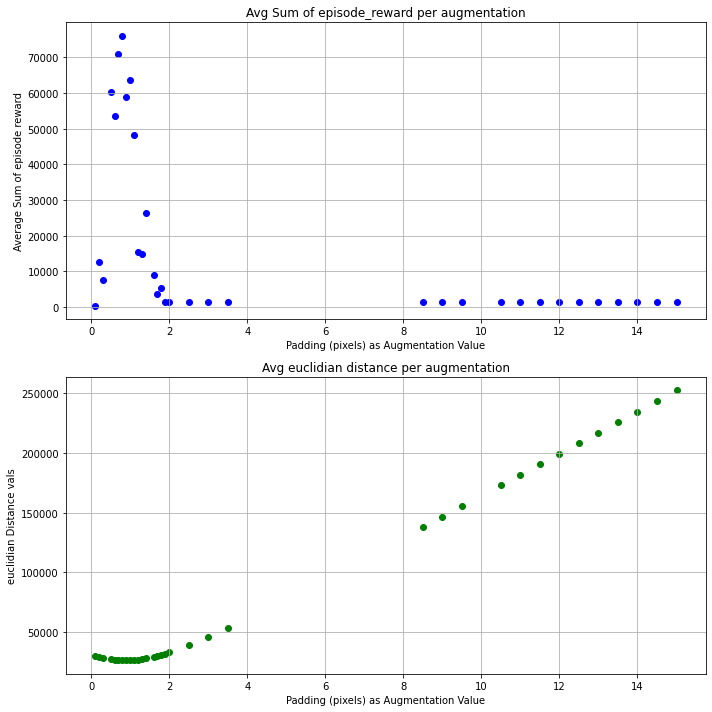

In [21]:
stats_distance_name = 'euclidian'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)



correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)


proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')

Pearson correlation coefficient (means over sums): 0.8935816804275509
Pearson correlation coefficient (maxes over sums): 0.8909463664509936
Pearson correlation coefficient (means over maxes): 0.9826745324420872
Pearson correlation coefficient (maxes over maxes): 0.9817864137346974


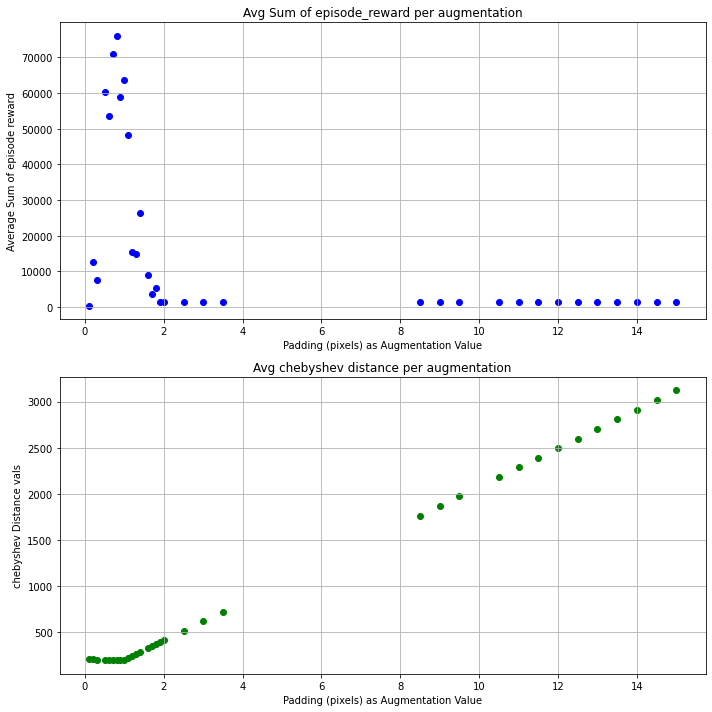

In [22]:
stats_distance_name = 'chebyshev'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)


correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')


Pearson correlation coefficient (means over sums): 0.8322280933371335
Pearson correlation coefficient (maxes over sums): 0.8289179862181777
Pearson correlation coefficient (means over maxes): 0.9608810366603473
Pearson correlation coefficient (maxes over maxes): 0.9601101588329874


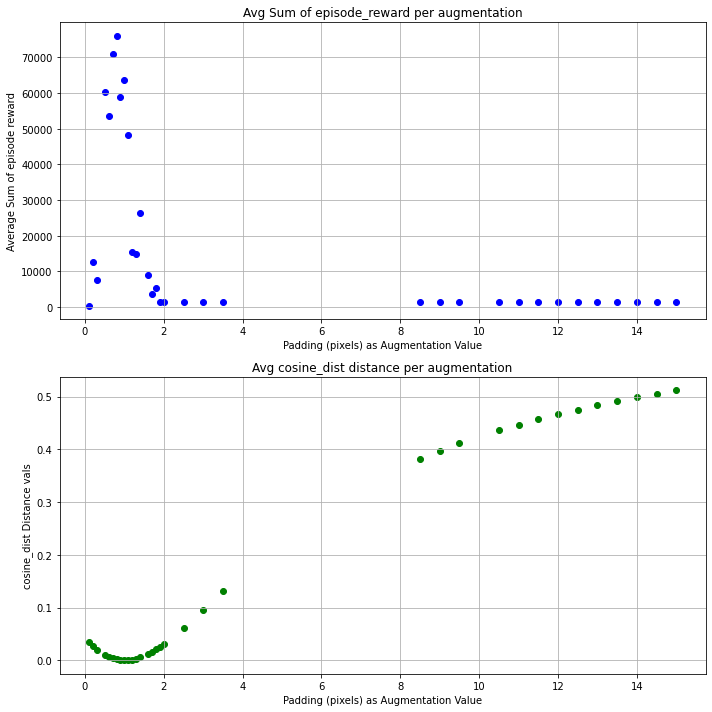

In [23]:
stats_distance_name = 'cosine_dist'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')


In [24]:
stats_distance_name = 'bhattacharyya'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')

ValueError: array must not contain infs or NaNs

Pearson correlation coefficient (means over sums): 0.1143351637012428
Pearson correlation coefficient (maxes over sums): 0.1135915351126276
Pearson correlation coefficient (means over maxes): 0.14154531936313597
Pearson correlation coefficient (maxes over maxes): 0.14135150089896392


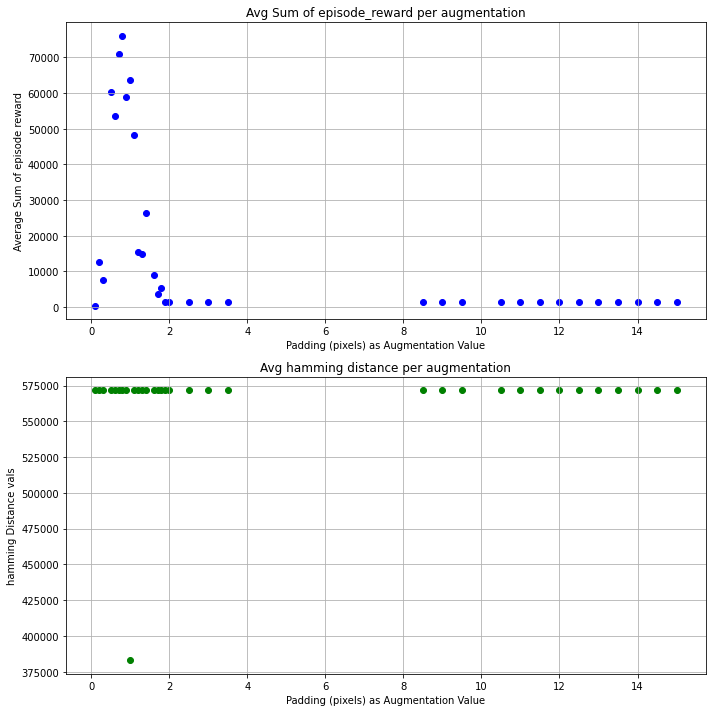

In [25]:
stats_distance_name = 'hamming'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')

In [26]:
stats_distance_name = 'kl_div'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')

ValueError: array must not contain infs or NaNs

Pearson correlation coefficient (means over sums): 0.904566220586692
Pearson correlation coefficient (maxes over sums): 0.9020572199907859
Pearson correlation coefficient (means over maxes): 0.9834231755697125
Pearson correlation coefficient (maxes over maxes): 0.9825532607739909


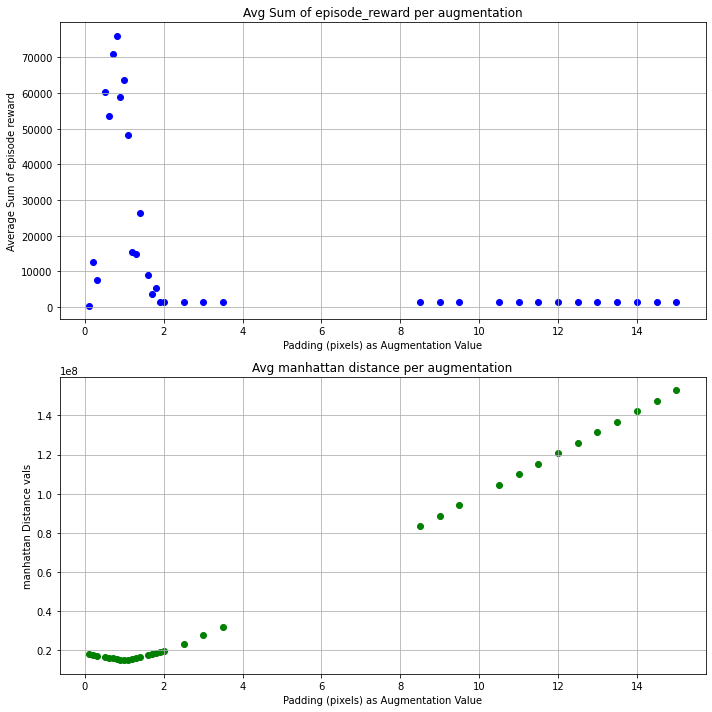

In [27]:
stats_distance_name = 'manhattan'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')